# IMPORT LIBRARIES

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [9]:
trainset = pd.read_csv('data/cleaned_df_train.csv')

In [10]:
trainset

,Unnamed: 0,ID,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other relition,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Target
0,0,1,33,1,3,2,8,0,5,1,...,0,0,0,1,0,0,0,0,0,0
1,1,2,37,1,2,2,8,1,4,1,...,0,0,0,1,0,0,0,0,0,0
2,2,3,37,1,2,2,8,0,4,2,...,0,0,0,1,0,0,0,0,0,0
3,3,4,9,1,3,3,3,2,3,2,...,0,0,0,1,0,0,0,0,0,0
4,4,5,40,1,4,2,10,1,4,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5817,5818,36,1,1,2,8,0,6,1,...,0,0,0,1,0,0,0,0,0,0
5818,5818,5819,35,1,4,4,8,1,4,1,...,0,0,0,1,0,0,0,0,0,0
5819,5819,5820,33,1,3,4,8,0,6,0,...,0,0,0,1,0,0,0,0,0,1
5820,5820,5821,34,1,3,2,8,0,7,0,...,0,0,0,0,0,0,0,0,0,0


# SPLIT DATA

In [18]:
### Apply SMOTE to handle imbalance

X_train, X_test, y_train, y_test = train_test_split(trainset.iloc[:,2:-1], trainset.iloc[:,-1], train_size=0.75, shuffle=True)


# FEATURE SELECTION

In [19]:
from sklearn.feature_selection import chi2
cols,chi_lst, p_values, = [], [],[]
for col in list(trainset.columns)[2:-1]:
    chi, p,  = chi2(np.array(trainset[col]).reshape(-1,1), np.array(trainset['Target']).reshape(-1,1))
    chi_lst.append(chi[0])
    p_values.append(p[0])
    cols.append(col)
    
results = pd.DataFrame({
    'Features': cols,
    "Chi-Square":chi_lst,
    'p_values': p_values
})

In [20]:
cols_chi=results[results.p_values<=0.05].Features
cols_chi.shape

(55,)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [23]:
features_important = pd.DataFrame({'names': list(trainset.columns)[2:-1],
        'score':clf.feature_importances_}).sort_values(by='score', ascending=False)

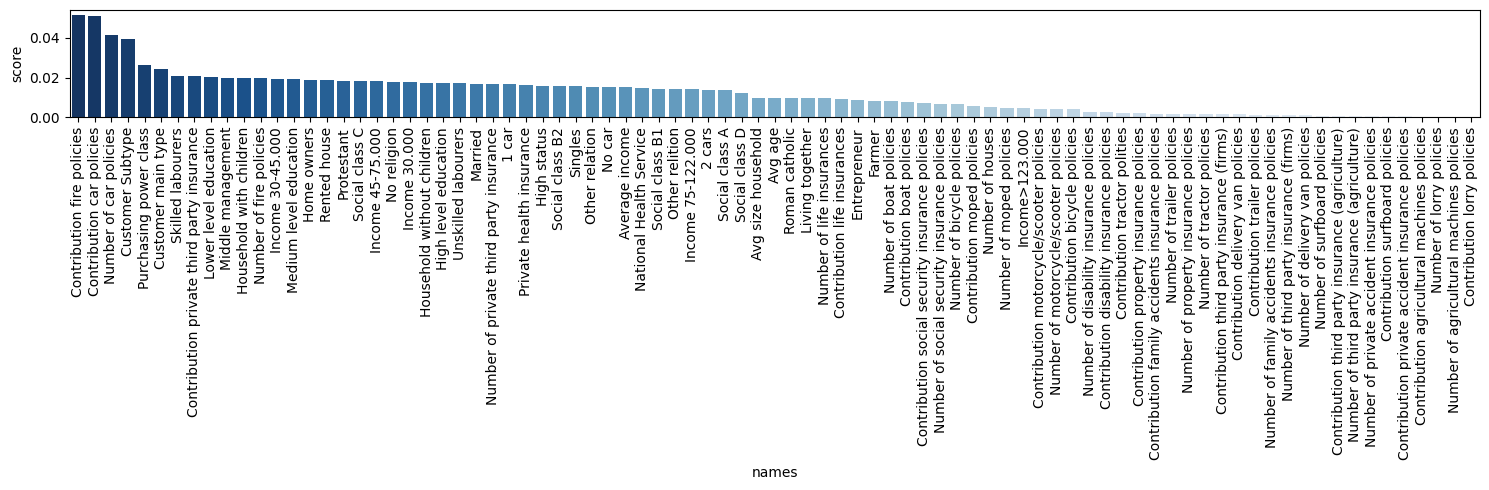

In [24]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(data=features_important, y='score', x='names', palette='Blues_r')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/important_features.png')
# plt.xticks(rotation=90)

In [25]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

42

In [26]:
selected_feat

Index(['Customer Subtype', 'Customer main type', 'Protestant',
       'Other relition', 'No religion', 'Married', 'Other relation', 'Singles',
       'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Middle management',
       'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C',
       'Social class D', 'Rented house', 'Home owners', '1 car', 'No car',
       'National Health Service', 'Private health insurance', 'Income 30.000',
       'Income 30-45.000', 'Income 45-75.000', 'Income 75-122.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution car policies', 'Contribution life insurances',
       'Contribution fire policies', 'Number of private third party insurance',
       'Number of car policies', 'Number of life insurances',


In [27]:
list_important_features = ['Customer Subtype', 'Customer main type', 'Protestant',
       'Other relition', 'No religion', 'Married', 'Other relation', 'Singles',
       'Household without children', 'Household with children',
       'High level education', 'Medium level education',
       'Lower level education', 'High status', 'Middle management',
       'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Average income',
       'Purchasing power class', 'Contribution private third party insurance',
       'Contribution car policies', 'Contribution fire policies',
       'Contribution boat policies', 'Number of private third party insurance',
       'Number of car policies', 'Number of fire policies']
sociademographic_cols= list(trainset.iloc[:,0:43].columns)
print(len(sociademographic_cols))
sociademographic_cols = [i for i in sociademographic_cols if i in list_important_features]
print(len(sociademographic_cols))

product_ownership = trainset[trainset.iloc[:,43:].columns]
print(len(sociademographic_cols))
product_ownership_cols = [i for i in product_ownership.columns if i in list_important_features]
print(len(product_ownership_cols))

sociademographic_cols = sociademographic_cols + ['Target', 'Farmer']
product_ownership_cols = product_ownership_cols + ['Target', 'Farmer']
# product_ownership_cols

43
32
32
9


# COVARIATE 

<AxesSubplot:>

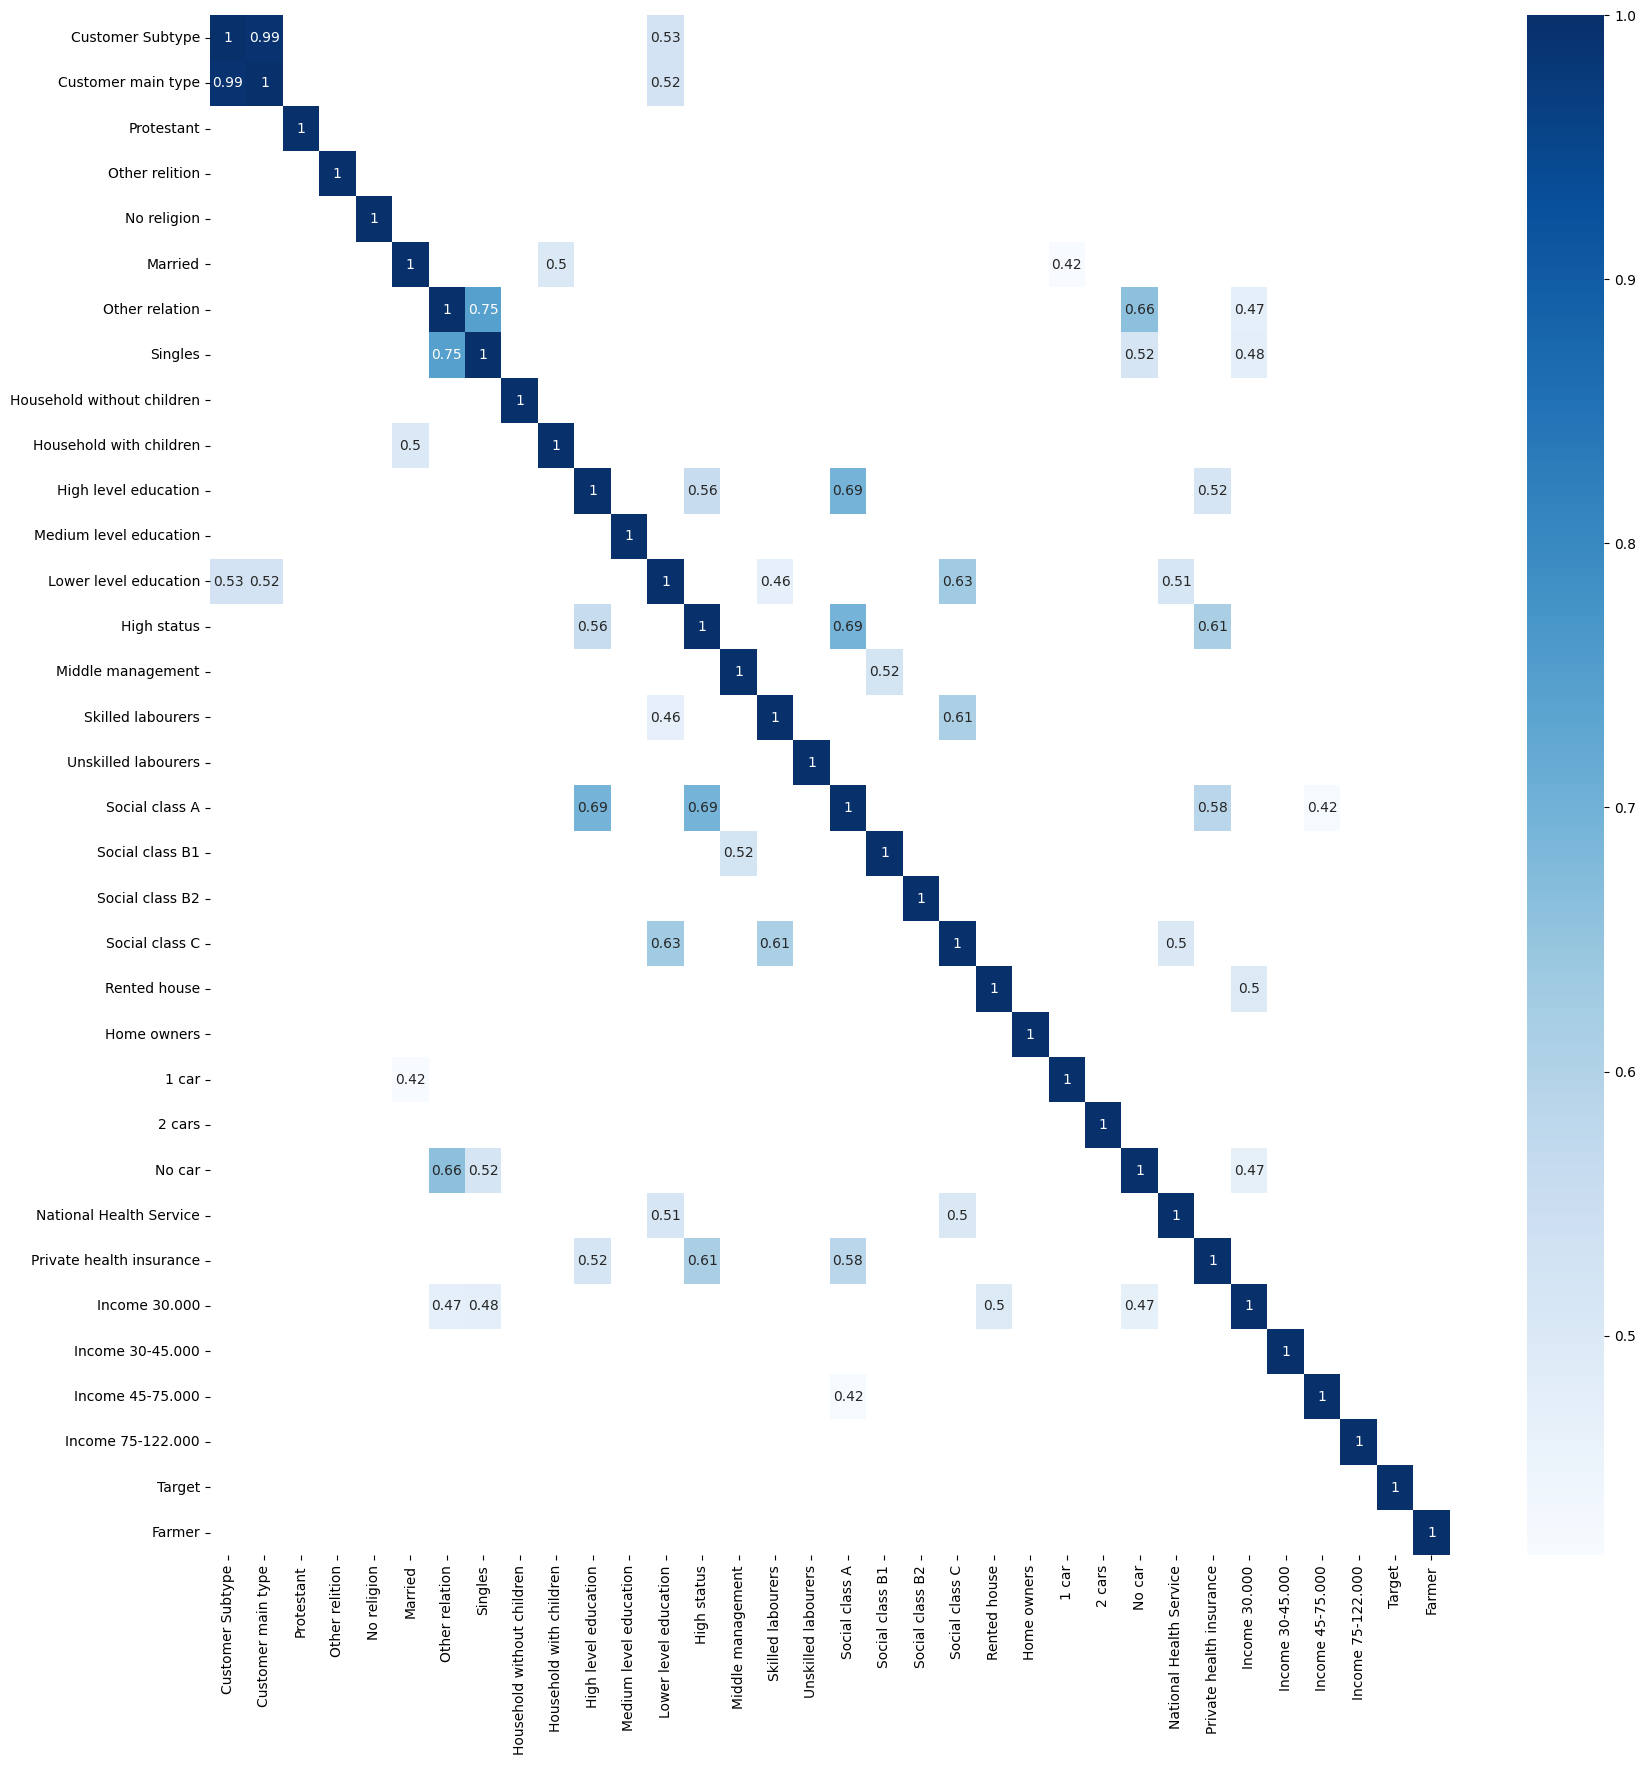

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(trainset[sociademographic_cols].corr()[trainset[sociademographic_cols].corr()>0.4], annot=True, cmap='Blues')


Correlated variables:
- Low level of education and Customer subtype/main type, Social Class C, National Health Service and Skilled labours
- Middle Management and Social Class B
- High level of education and High status/Social Class A/Private Health Insurance
- Single customers, other relation and No car
- Married and 1 car
- Income 30.000 (low income) and National Health Service and Rented Houses
- Income 45.000-75.000 and Social Class A.

<AxesSubplot:>

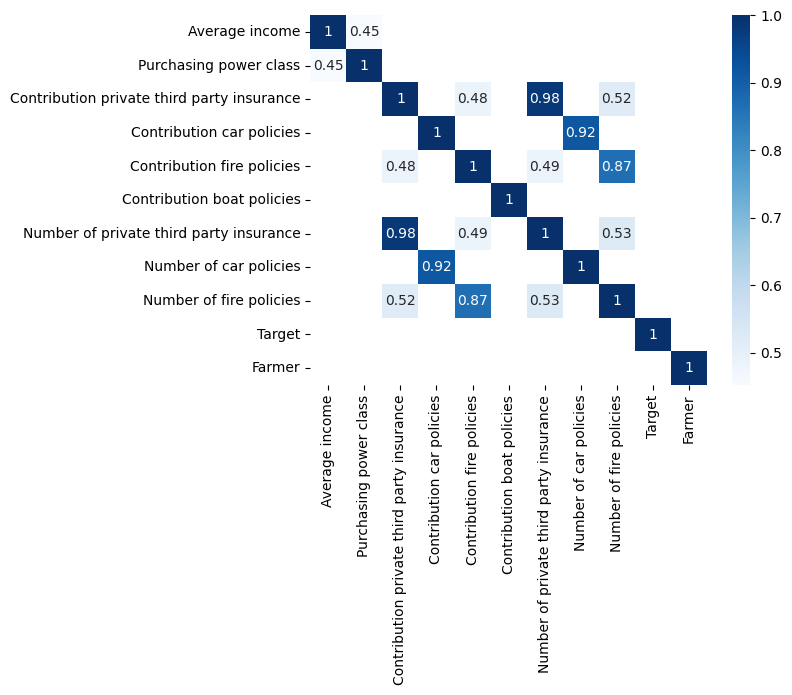

In [25]:
sns.heatmap(trainset[product_ownership_cols].corr()[trainset[product_ownership_cols].corr()>0.4], annot=True, cmap='Blues')

Correlated variables:
- Average income and Purchasing Power Class
- Private third party insurance and Fire Policy
- Contribution and Number of car/fire policies

# APPLY SMOTE FOR IMBALANCE DATA

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train[selected_feat], y_train)
X_res.shape

# Apply PCA because covariate correlated in the dataset (heatmap see in other section)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_res)
X_test_pca = pca.transform(X_test)

# MODELS SURVEY

In [30]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler

In [116]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)

In [117]:
sc = StandardScaler()

In [118]:
X_train

,Customer Subtype,Number of houses,Avg size household,Avg age,Customer main type,Roman catholic,Protestant,Other relition,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
1441,35,1,3,3,8,0,6,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1623,32,1,2,4,7,2,4,3,2,6,...,0,0,0,0,1,0,0,0,0,0
3148,33,1,3,3,8,0,4,1,4,7,...,0,0,0,0,0,0,0,0,0,0
1209,1,1,3,4,1,0,4,0,5,7,...,0,0,0,0,0,0,0,0,0,0
1606,39,1,4,2,9,0,5,1,4,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,35,1,2,3,8,0,5,2,2,6,...,0,0,0,0,0,0,0,0,0,0
3381,36,1,3,2,8,0,7,2,0,7,...,0,0,0,0,1,0,0,0,0,0
626,33,1,3,3,8,1,4,1,5,7,...,0,0,0,0,0,0,1,0,0,0
4492,28,2,2,5,6,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0


In [119]:
y_res

0       0
1       1
2       0
3       0
4       0
       ..
8203    1
8204    1
8205    1
8206    1
8207    1
Name: Target, Length: 8208, dtype: int64

In [120]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_res, X_test, y_res, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:21<00:00,  1.37it/s]


In [123]:
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.94,0.50,0.50,0.91,0.03
SVC,0.93,0.52,0.52,0.91,1.04
CalibratedClassifierCV,0.93,0.54,0.54,0.92,2.42
RidgeClassifierCV,0.93,0.51,0.51,0.91,0.07
RidgeClassifier,0.93,0.51,0.51,0.91,0.04
LinearDiscriminantAnalysis,0.93,0.51,0.51,0.91,0.11
LGBMClassifier,0.93,0.57,0.57,0.92,0.16
LinearSVC,0.92,0.54,0.54,0.91,0.76
XGBClassifier,0.92,0.56,0.56,0.91,0.44


##### From LaziPredict Summary models we can see that the best models are SVC, LGBMClassifier, RidvgeCV, LinearDiscriminantAnalysis, CalibratedClassifierCV

# TRY LAZYPREDICT AFTER PCA

In [32]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_pca, X_test_pca, y_res, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:41<00:00,  1.45s/it]


In [44]:
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.94,0.50,0.50,0.91,0.03
NuSVC,0.94,0.51,0.51,0.91,3.48
SVC,0.93,0.52,0.52,0.91,1.41
RandomForestClassifier,0.93,0.51,0.51,0.91,5.75
RidgeClassifierCV,0.93,0.51,0.51,0.91,0.10
LGBMClassifier,0.93,0.53,0.53,0.91,0.48
ExtraTreesClassifier,0.93,0.51,0.51,0.91,1.01
RidgeClassifier,0.93,0.51,0.51,0.91,0.06
LinearDiscriminantAnalysis,0.93,0.51,0.51,0.91,0.14


# MAKE A PIPELINE FOR MODELS AND HYPERPARAMETER TUNING

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# pd.options.plotting.backend  = "plotly"

In [45]:
# train.info()

In [46]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_classif, k=5)),
                 ('classifier', LogisticRegression())])

In [47]:
# search_space = [{'selector__k': [5, 10, 20, 30]},
#                 {'classifier': [LogisticRegression(solver='lbfgs')]},
#                 {'classifier': [RandomForestClassifier(n_estimators=100)],
#                  'classifier__max_depth': [5, 10, None]},
#                 {'classifier': [KNeighborsClassifier()],
#                  'classifier__n_neighbors': [3, 7, 11],
#                  'classifier__weights': ['uniform', 'distance']}]

In [48]:
# search_space = [{'selector__k':[5,10,20,30]},
#            {'classifier':[LogisticRegression(solver='lbfgs')],
#            'classifier__C':[0.01, 0.1, 1.0]}]

In [49]:
# clf.get_params().keys()

In [50]:
# clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
# clf = clf.fit(X_train, y_train)

In [51]:
# clf.best_estimator_

In [58]:
search_space = [{'selector__k':[5,10,20,30]},
           {'classifier':[LogisticRegression(solver='lbfgs')],
           'classifier__C':[0.01, 0.1, 1.0]},
               {'classifier':[RidgeClassifier()],
                'classifier__alpha':[0.1, 1.0, 10],
               'classifier__max_iter':[100, 150, 200],
               'classifier__class_weight':['dict', 'balanced'],
               'classifier__solver': ['svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs']},
               {'classifier':[RidgeClassifierCV()],
               'classifier__alphas':[0.1, 1.0, 10.0],
               'classifier__cv':[5, 10, 15]},
               {'classifier':[SVC()],
                'classifier__C':[0.01, 0.1, 1.0],
               'classifier__kernel':["linear", "poly", "rbf", "sigmoid", "precomputed"],
               'classifier__gamma':['scale', 'auto', 'float'],
               'classifier__class_weight': ['dict', 'balanced']},
               {'classifier':[AdaBoostClassifier()],
               'classifier__n_estimators':[50,100,150],
               'classifier__learning_rate':[0.0001, 0.001, 0.01]},
               {'classifier':[GaussianNB()]},
               {'classifier':[BernoulliNB()],
               'classifier__alpha':[0.1, 1.0, 10]}]

In [127]:
clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
clf = clf.fit(X_res, y_res)

In [ ]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000001B84A8EE8C8>)),
                ('classifier', LogisticRegression())])

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_roc_curve,roc_auc_score

In [134]:
X_train.shape, X_test.shape, y_test.shape

((4366, 85), (1456, 85), (1456,))

In [ ]:
f1_score()

In [ ]:
roc_auc_score(y, clf.predict_proba(X)[:, 1])

In [148]:
C = np.arange(0.01, 1, 0.05)
penalty = ['l1']
solvers = ['liblinear', 'saga']
multi_classes = ['ovr']
max_iters = [50,100,150]
n_jobs=[1, -1]
random_states = np.arange(0,100,10)
params, precisions, recalls, f1_scores, accuracy_scores = [], [], [], [], []
coef_s = []
aucs = []
for i in C:
    for j in penalty:
        for k in solvers:
            for m in multi_classes:
                for n in max_iters:
                    for g in n_jobs:
                        for h in random_states:
                            lr = LogisticRegression(C=i, penalty=j, solver = k, multi_class=m, max_iter=n, n_jobs=g, random_state=h )
                            lr.fit(X_res, y_res)
                            y_pred = lr.predict(X_test)
                            precisions.append(precision_score(y_test, y_pred))
                            recalls.append(recall_score(y_test, y_pred))
                            f1_scores.append(f1_score(y_test, y_pred))
                            accuracy_scores.append(accuracy_score(y_test, y_pred))
                            params.append([i,j,k,m,n,g,h])
                            coefs = lr.coef_
                            coef_s.append(coefs)
                            auc=roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
                            aucs.append(auc)
#                             params.append(precision_score(y_test, y_pred))
        
                                
lr_df = pd.DataFrame({
    'params':params,
    'precisions':precisions,
    'recalls': recalls,
    'f1_scores':f1_scores,
    'accuracy': accuracy_scores,
    'coef_s':'coefs',
    'aucs':aucs
})


PermissionError: [Errno 13] Permission denied: 'LogisticRegression.csv'

In [149]:
lr_df.to_csv('Models_summary/LogisticRegression2.csv')

In [151]:
lr_df[lr_df.accuracy==lr_df.accuracy.max()]

,params,precisions,recalls,f1_scores,accuracy,coef_s,aucs
1563,"[0.66, l1, liblinear, ovr, 50, 1, 30]",0.19,0.13,0.15,0.92,coefs,0.66
1565,"[0.66, l1, liblinear, ovr, 50, 1, 50]",0.19,0.13,0.15,0.92,coefs,0.66
1573,"[0.66, l1, liblinear, ovr, 50, -1, 30]",0.19,0.13,0.15,0.92,coefs,0.66
1575,"[0.66, l1, liblinear, ovr, 50, -1, 50]",0.19,0.13,0.15,0.92,coefs,0.66
1580,"[0.66, l1, liblinear, ovr, 100, 1, 0]",0.19,0.13,0.15,0.92,coefs,0.66
1581,"[0.66, l1, liblinear, ovr, 100, 1, 10]",0.19,0.13,0.15,0.92,coefs,0.66
1582,"[0.66, l1, liblinear, ovr, 100, 1, 20]",0.19,0.13,0.15,0.92,coefs,0.66
1583,"[0.66, l1, liblinear, ovr, 100, 1, 30]",0.19,0.13,0.15,0.92,coefs,0.66
1584,"[0.66, l1, liblinear, ovr, 100, 1, 40]",0.19,0.13,0.15,0.92,coefs,0.66
1585,"[0.66, l1, liblinear, ovr, 100, 1, 50]",0.19,0.13,0.15,0.92,coefs,0.66


In [141]:
lr_df.to_csv('Models_summary/LogisticRegression.csv')

In [153]:
from sklearn.calibration import CalibratedClassifierCV
cv = [5,7,10]
methods = ['sigmoid', 'isotonic']
ensemble=[True, False]
params, precisions, recalls, f1_scores, accuracy_scores = [], [], [], [], []
coef_s = []
aucs = []
for i in methods:
    for j in cv:
        for k in ensemble:
            svc_c = CalibratedClassifierCV(method=i, cv=j, ensemble = k)
            svc_c.fit(X_res, y_res)
            y_pred = svc_c.predict(X_test)
            precisions.append(precision_score(y_test, y_pred))
            recalls.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            params.append([i,j,k])
            auc=roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            aucs.append(auc)
            
#                             params.append(precision_score(y_test, y_pred))
        
                                
calibrated_df = pd.DataFrame({
    'params':params,
    'precisions':precisions,
    'recalls': recalls,
    'f1_scores':f1_scores,
    'accuracy': accuracy_scores,
    'coef_s':'coefs',
    'aucs':aucs
})

calibrated_df.to_csv('calibrated_df.csv')

In [47]:
from lightgbm import LGBMClassifier

In [160]:
boosting_type = ['gbdt', 'dart', 'goss']
num_leaves = [10,20,30,40]
max_depth = [3,5,7,10]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
n_estimators = [50,100,150]
params, precisions, recalls, f1_scores, accuracy_scores = [], [], [], [], []
# coef_s
aucs =[]
for i in boosting_type:
    for j in num_leaves:
        for k in max_depth:
            for m in learning_rate:
                for n in n_estimators:
                    booster = LGBMClassifier(boosting_type=i, num_leaves=j, max_depth = k, learning_rate=m, n_estimators=n )
                    booster.fit(X_res, y_res)
                    y_pred = booster.predict(X_test)
                    precisions.append(precision_score(y_test, y_pred))
                    recalls.append(recall_score(y_test, y_pred))
                    f1_scores.append(f1_score(y_test, y_pred))
                    accuracy_scores.append(accuracy_score(y_test, y_pred))
                    params.append([i,j,k,m,n])
#                     coefs = booster.coef_
#                     coef_s.append(coefs)
                    auc=roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
                    aucs.append(auc)
#                             params.append(precision_score(y_test, y_pred))
        
                                
booster_df = pd.DataFrame({
    'params':params,
    'precisions':precisions,
    'recalls': recalls,
    'f1_scores':f1_scores,
    'accuracy': accuracy_scores,
#     'coef_s':'coefs',
    'aucs':aucs
})
booster_df.to_csv('Models_summary/booster_df.csv')


In [165]:
C = np.arange(0.01, 1, 0.05)
kernel = ["linear", "poly", "rbf", "sigmoid"]
gamma = ['scale', 'auto']
decision_function_shape = [ 'ovr']
verbose = [True,False]
params, precisions, recalls, f1_scores, accuracy_scores = [], [], [], [], []
# coef_s
aucs =[]
for i in C:
    for j in kernel:
        for k in gamma:
            for m in decision_function_shape:
                for n in verbose:
                    svc = SVC(C=i, kernel=j, gamma = k, decision_function_shape=m, verbose=n)
                    svc.fit(X_res, y_res)
                    y_pred = svc.predict(X_test)
                    precisions.append(precision_score(y_test, y_pred))
                    recalls.append(recall_score(y_test, y_pred))
                    f1_scores.append(f1_score(y_test, y_pred))
                    accuracy_scores.append(accuracy_score(y_test, y_pred))
                    params.append([i,j,k,m,n])
                    auc=roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
                    aucs.append(auc)
#                             params.append(precision_score(y_test, y_pred))
        
                                
svc_df = pd.DataFrame({
    'params':params,
    'precisions':precisions,
    'recalls': recalls,
    'f1_scores':f1_scores,
    'accuracy': accuracy_scores,
    'coef_s':'coefs',
    'aucs':aucs
})

svc_df.to_csv('Models_summary/svc_df.csv')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [24]:
svc = SVC(C=0.11, kernel='poly', gamma='auto', degree=3)
svc.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

In [25]:
roc_auc_score(y_test, y_pred)

0.5270961509126965

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1385
           1       0.09      0.11      0.10        71

    accuracy                           0.90      1456
   macro avg       0.52      0.53      0.52      1456
weighted avg       0.91      0.90      0.91      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


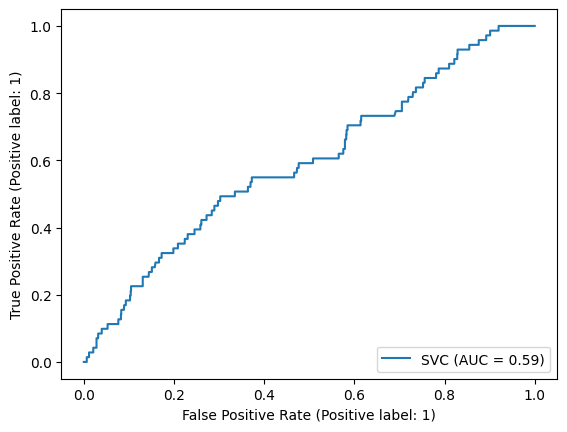

In [27]:
plot_roc_curve(svc, X_test[selected_feat], y_test)

In [32]:
svc = SVC()
svc.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

In [33]:
roc_auc_score(y_test, y_pred)

0.5169776783444348

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1385
           1       0.11      0.06      0.08        71

    accuracy                           0.93      1456
   macro avg       0.53      0.52      0.52      1456
weighted avg       0.91      0.93      0.92      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


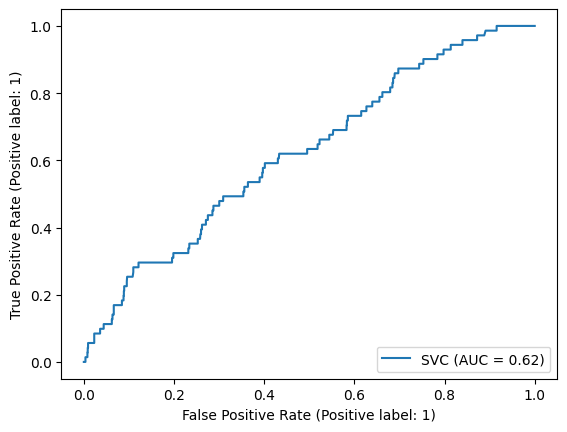

In [35]:
plot_roc_curve(svc, X_test[selected_feat], y_test)

In [80]:
lr = LogisticRegression()
lr.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [81]:
roc_auc_score(y_test, y_pred)

0.5670259826104642

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1385
           1       0.08      0.32      0.13        71

    accuracy                           0.79      1456
   macro avg       0.52      0.57      0.50      1456
weighted avg       0.92      0.79      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


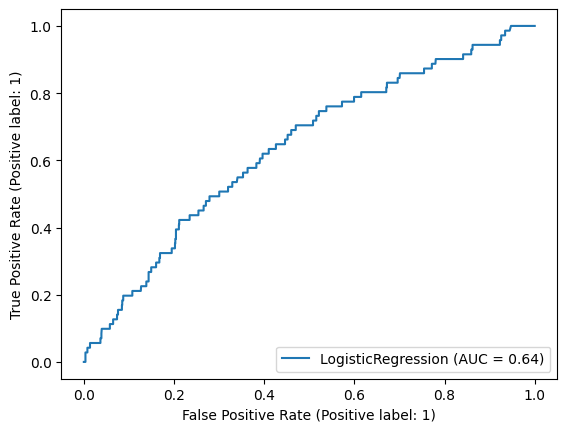

In [39]:
plot_roc_curve(lr, X_test[selected_feat], y_test)

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1385
           1       0.08      0.32      0.13        71

    accuracy                           0.79      1456
   macro avg       0.52      0.57      0.50      1456
weighted avg       0.92      0.79      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


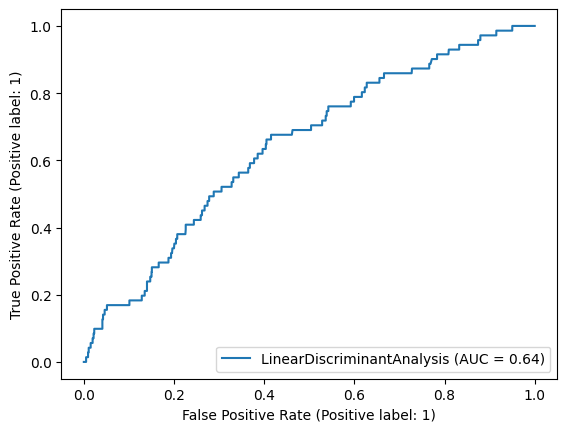

In [79]:
plot_roc_curve(lda, X_test[selected_feat], y_test)

In [85]:
X_train_pca.shape

(8178, 85)

In [84]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier(boosting_type='goss', num_leaves=40, max_depth = 10, learning_rate=0.1, n_estimators=50, random_state=0)
lgm.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

accuracy_score(y_test, y_pred)
# ['goss', 40, 10, 0.1, 50]


C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 85 features, but LogisticRegression is expecting 40 features as input.

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1385
           1       0.08      0.32      0.13        71

    accuracy                           0.79      1456
   macro avg       0.52      0.57      0.50      1456
weighted avg       0.92      0.79      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


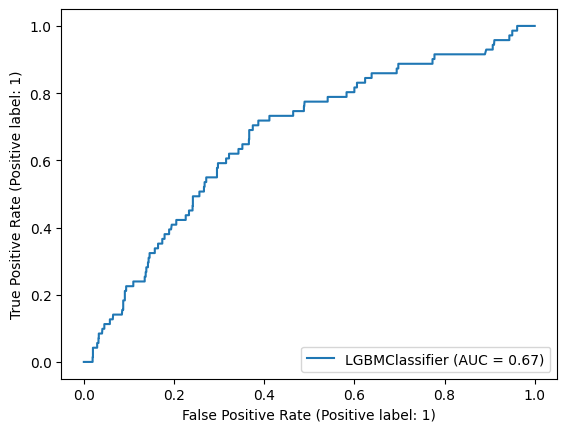

In [76]:
plot_roc_curve(lgm, X_test[selected_feat], y_test)

In [71]:
from sklearn.calibration import CalibratedClassifierCV
cc = CalibratedClassifierCV()
cc.fit(X_res[selected_feat], y_res)
y_pred = svc.predict(X_test[selected_feat])

accuracy_score(y_test, y_pred)
# ['goss', 40, 10, 0.1, 50]

# CalibratedClassifierCV

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0.7864010989010989

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1385
           1       0.08      0.32      0.13        71

    accuracy                           0.79      1456
   macro avg       0.52      0.57      0.50      1456
weighted avg       0.92      0.79      0.84      1456



C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


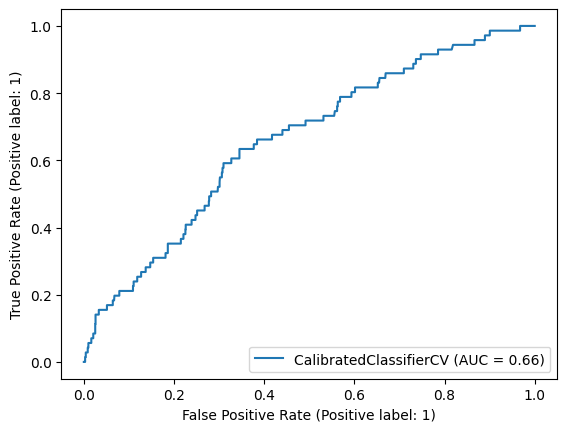

In [73]:
plot_roc_curve(cc, X_test[selected_feat], y_test)

# Conclusion

- In Lazypredict, various models are potential with high accuracy and f1-score (>91%) but balanced accuracy is low.
- GridSearchCV suggest Logistic Regression
- When choose 4 best algorithsm (SVC, Logistic, LBGMClassifier, LinearDiscrimiateAnalysis) to tuning Hyperparameter found out that recall and f1-score are very low in actual (<0.3), accuracy and auc are also low
- ==> consider apply PCA to improve the recall, precision, accuracy and auc value.